f

f

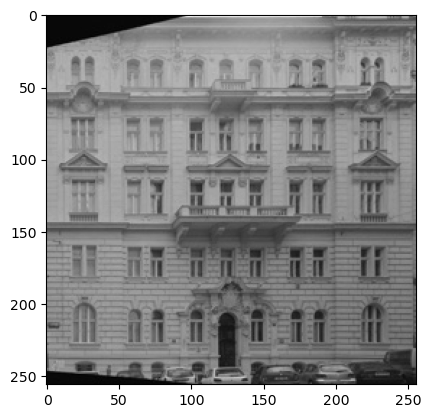

In [51]:
from PIL import Image
from torch.nn.functional import conv2d, avg_pool2d, avg_pool3d, max_pool2d
from torchvision.transforms.functional import pil_to_tensor, rgb_to_grayscale
from torchvision.utils import save_image
from torch.distributions import MultivariateNormal
import torch 
import matplotlib.pyplot as plt 
from typing import Tuple 
from utils.fn import gaussian2d
import numpy as np 

def imshow(img: torch.Tensor):
        plt.imshow(img.permute(1, 2, 0), cmap='gray')


mask = gaussian2d(256, 256).unsqueeze(0).unsqueeze(0).repeat(1, 1, 1, 1)
img = rgb_to_grayscale(pil_to_tensor(Image.open('facades/image_008.jpg'))[:, :, :256])/255
imshow(img)

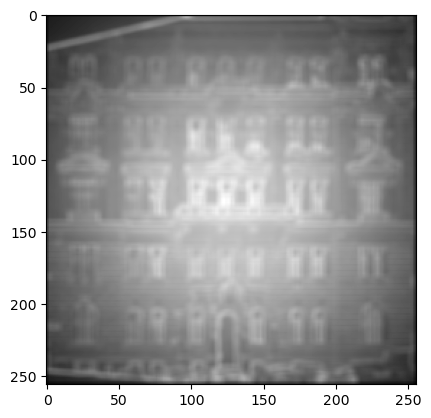

In [78]:
k1, k2 = 3, 5
W = max_pool2d(img, kernel_size=k1, stride=1, padding=k1//2) \
    + max_pool2d(-img, kernel_size=k1, stride=1, padding=k1//2) + mask
W = avg_pool2d(W, kernel_size=k2, stride=1, padding=k2//2)
# W = (W-W.min())/(W.max()-W.min())
imshow(W.squeeze(0))

In [71]:
W.shape

torch.Size([1, 256, 256])

In [128]:
m = MultivariateNormal(torch.zeros(256,256), torch.eye(256)).sample().unsqueeze(0)
m.shape

torch.Size([1, 256, 256])

In [129]:
img.shape

torch.Size([1, 1, 256, 256])

In [33]:
net(inputs).max()

tensor(1., grad_fn=<MaxBackward1>)